In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#veri setini içeri aktarıyoruz
data = pd.read_csv('/content/drive/MyDrive/data-1.csv', delimiter=',')
X = data.iloc[:,0:7].values
y = data.iloc[:,7].values
X.shape

(3810, 7)

In [ ]:
#problem türü: sınıflandırma
from keras.layers import Dropout
from keras import regularizers
#model olusturma
#model 3 katmadan oluşuyor/giriş katmanı,hidden ve çıktı katmanı
#model eğitim aşamasında overfitting'e ugradım grafikte train ve valid eğrilerim birbirine çok uzaktı.
#overfitting engelleme yöntemlerinden regularization uyguladım her üc katmanda
model = Sequential()
model.add(Dense(100, input_dim=7,kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dense(30, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 100)               800       
                                                                 
 dense_127 (Dense)           (None, 30)                3030      
                                                                 
 dense_128 (Dense)           (None, 1)                 31        
                                                                 
Total params: 3,861
Trainable params: 3,861
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#test verisi ayırma
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=58)

In [ ]:
#veri ölçeklendirme(0-1 arasında)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train= mms.fit_transform(X_train)
X_test= mms.transform(X_test)

In [ ]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=200)

Epoch 1/200
77/77 [==============================] - 1s 5ms/step - loss: 1.0519 - accuracy: 0.7986 - val_loss: 0.8201 - val_accuracy: 0.8984
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.8749 - val_loss: 0.5479 - val_accuracy: 0.9098
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.9032 - val_loss: 0.4505 - val_accuracy: 0.9049
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.9098 - val_loss: 0.3997 - val_accuracy: 0.9262
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.9122 - val_loss: 0.3809 - val_accuracy: 0.9295
Epoch 6/200
77/77 [==============================] - 0s 4ms/step - loss: 0.3986 - accuracy: 0.9176 - val_loss: 0.3683 - val_accuracy: 0.9377
Epoch 7/200
77/77 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.9200 - val_loss: 0.3616 - val_accuracy: 0.9328
Epoch 8/200
7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


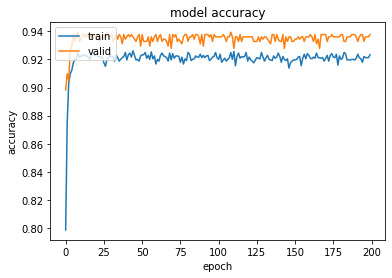

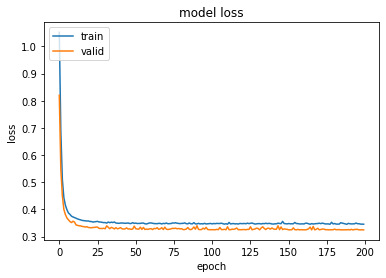

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# accuracy grafigi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# loss grafigi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_train,y_train,batch_size=1)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test,batch_size=1)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

3048/3048 [==============================] - 8s 3ms/step - loss: 0.3406 - accuracy: 0.9281
Training Accuracy: 92.81%

762/762 [==============================] - 2s 2ms/step - loss: 0.3313 - accuracy: 0.9344
Testing Accuracy: 93.44%



[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 

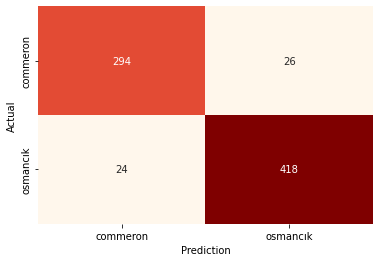

In [ ]:
#confusion matrix olusturma
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred_test = model.predict(X_test)
y_pred=[]
for i in y_pred_test:
  if(i>=0.5):
    y_pred.append(1)
  else:
    y_pred.append(0)
print(y_pred)
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, annot=True, xticklabels=["commeron",'osmancık'], yticklabels=['commeron','osmancık'],
                fmt='g',cbar=False,cmap='OrRd')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

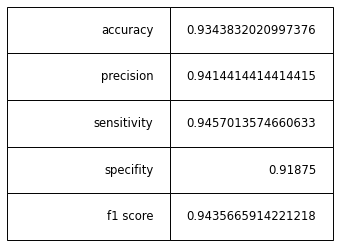

In [ ]:
from sklearn import metrics
from imblearn.metrics import sensitivity_score , specificity_score
import matplotlib.pyplot as plt 
accuracy = metrics.accuracy_score(y_test, y_pred)
precision=metrics.precision_score(y_test, y_pred)
sensitivity= sensitivity_score(y_test, y_pred)
specificity= specificity_score(y_test, y_pred)
f1_score=2*(precision*sensitivity)/(precision+sensitivity)

fig = plt.figure(dpi=70)
ax = fig.add_subplot(1,1,1)
table_data=[
    ["accuracy", accuracy],
    ["precision", precision],
    ["sensitivity", sensitivity],
    ["specifity", specificity],
    ["f1 score", f1_score]
]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')
plt.show()

In [ ]:
#farklı optimizasyon algoritmalarını denemek için modeli tekrar oluşturdum
from keras.layers import Dense, Dropout
from keras import regularizers
import keras
from keras.models import Sequential

def build_model(optimizer):

  model = Sequential()
  model.add(Dense(100, input_dim=7,kernel_regularizer=regularizers.l2(0.01), activation='relu'))
  model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
  model.summary()

  model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
  return model

In [ ]:
optimizers = {
        'Adam': 'optim.Adam(model.parameters())',
        'SGD': 'optim.SGD(model.parameters(), lr=0.01, momentum=0.9)',
        'Adadelta': 'optim.Adadelta(model.parameters())',
        'Adagrad': 'optim.Adagrad(model.parameters())',
        'Adamax': 'optim.Adamax(model.parameters())',
        'Nadam': 'optim.Nadam(model.parameters())',
        'Ftrl': 'optim.Ftrl(model.parameters())',
        'Rmsprop': 'optim.Rmsprop(model.parameters())',
    }
val_accuracy=[]
val_loss=[]
for i in optimizers:
  model = build_model(i)
  history=model.fit(X_train,y_train,validation_split=0.2,verbose=0,epochs=50)
  val_accuracy.append(history.history['val_accuracy'])
  val_loss.append(history.history['val_loss'])
  print('Optimizer :'+i)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 100)               800       
                                                                 
 dense_103 (Dense)           (None, 50)                5050      
                                                                 
 dense_104 (Dense)           (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________
Optimizer :Adam
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 100)               800       
                                                                 
 dense_106 (

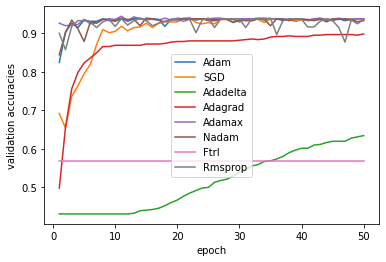

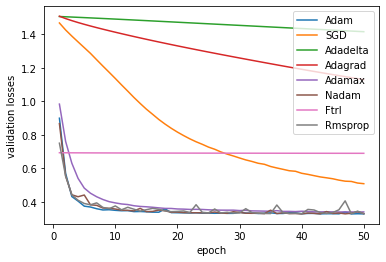

In [ ]:
import pickle
import random
from matplotlib import pyplot as plt
import numpy as np 

optimizers_ = list(optimizers.keys())
val_accuracy = dict(zip(optimizers_, val_accuracy))
val_loss = dict(zip(optimizers_, val_loss))

with open('val_accuracies', 'wb') as f:
    pickle.dump(val_accuracy, f)
with open('val_losses', 'wb') as f:
    pickle.dump(val_loss, f)

x = np.arange(50) + 1

for optimizers_ in optimizers_:
    plt.plot(x, val_accuracy[optimizers_], label=optimizers_)

plt.ylabel('validation accuracies')
plt.xlabel('epoch')
plt.legend()
plt.show()

for optimizers_ in optimizers:
    plt.plot(x, val_loss[optimizers_], label=optimizers_)

plt.ylabel('validation losses')
plt.xlabel('epoch')
plt.legend()
plt.show()